In [11]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import yfinance as yf
plt.style.use('fivethirtyeight')

In [12]:
df=yf.Ticker('DOGE-USD').history(start='2020-12-01', end='2022-02-03')
df=df[['Close']]
df

,Close
Date,
2020-11-30,0.003551
2020-12-01,0.003335
2020-12-02,0.003374
2020-12-03,0.003428
2020-12-04,0.003298
...,...
2022-01-29,0.143056
2022-01-30,0.139471
2022-01-31,0.141805


In [13]:
prediction_days=1
df['prediction']=df[['Close']].shift(-prediction_days)
df

,Close,prediction
Date,,
2020-11-30,0.003551,0.003335
2020-12-01,0.003335,0.003374
2020-12-02,0.003374,0.003428
2020-12-03,0.003428,0.003298
2020-12-04,0.003298,0.003397
...,...,...
2022-01-29,0.143056,0.139471
2022-01-30,0.139471,0.141805
2022-01-31,0.141805,0.142631


In [14]:
#create the independent data set (x)
X= np.array(df.drop(['prediction'], axis=1))
#Remove the last n+1 rows of data where n is the prediction_days
X=X[:len(df) - prediction_days -1]
#Print the data
print(X)

[[0.003551  ]
 [0.003335  ]
 [0.003374  ]
 [0.003428  ]
 [0.003298  ]
 [0.003397  ]
 [0.003388  ]
 [0.003342  ]
 [0.003179  ]
 [0.003158  ]
 [0.003105  ]
 [0.003079  ]
 [0.003163  ]
 [0.003256  ]
 [0.003231  ]
 [0.003206  ]
 [0.003416  ]
 [0.00373   ]
 [0.003858  ]
 [0.003927  ]
 [0.004625  ]
 [0.004787  ]
 [0.004508  ]
 [0.003768  ]
 [0.00457   ]
 [0.004582  ]
 [0.004494  ]
 [0.004548  ]
 [0.004592  ]
 [0.004486  ]
 [0.004636  ]
 [0.004682  ]
 [0.005685  ]
 [0.010615  ]
 [0.009771  ]
 [0.009767  ]
 [0.00992   ]
 [0.010465  ]
 [0.009742  ]
 [0.009846  ]
 [0.010194  ]
 [0.00986   ]
 [0.008835  ]
 [0.008063  ]
 [0.008616  ]
 [0.009397  ]
 [0.009369  ]
 [0.009265  ]
 [0.009067  ]
 [0.009171  ]
 [0.009098  ]
 [0.00906   ]
 [0.008166  ]
 [0.008524  ]
 [0.008579  ]
 [0.008727  ]
 [0.008383  ]
 [0.008255  ]
 [0.007482  ]
 [0.034084  ]
 [0.047162  ]
 [0.028176  ]
 [0.037196  ]
 [0.034875  ]
 [0.03152   ]
 [0.03712   ]
 [0.053289  ]
 [0.046935  ]
 [0.057595  ]
 [0.078782  ]
 [0.078825  ]
 [0.07

In [16]:
y=np.array(df['prediction'])
y=y[:-prediction_days - 1]
#show the data
print(y)

[0.003335   0.003374   0.003428   0.003298   0.003397   0.003388
 0.003342   0.003179   0.003158   0.003105   0.003079   0.003163
 0.003256   0.003231   0.003206   0.003416   0.00373    0.003858
 0.003927   0.004625   0.004787   0.004508   0.003768   0.00457
 0.004582   0.004494   0.004548   0.004592   0.004486   0.004636
 0.004682   0.005685   0.010615   0.009771   0.009767   0.00992
 0.010465   0.009742   0.009846   0.010194   0.00986    0.008835
 0.008063   0.008616   0.009397   0.009369   0.009265   0.009067
 0.009171   0.009098   0.00906    0.008166   0.008524   0.008579
 0.008727   0.008383   0.008255   0.007482   0.034084   0.047162
 0.028176   0.037196   0.034875   0.03152    0.03712    0.053289
 0.046935   0.057595   0.078782   0.078825   0.07007    0.072896
 0.069676   0.070069   0.06645    0.062537   0.056591   0.05352
 0.049376   0.059541   0.055139   0.054384   0.05598    0.053725
 0.047392   0.056555   0.050167   0.05048    0.050083   0.048052
 0.050599   0.050262   0.050

In [17]:
#Split the data into 80% training data set and a 20% testing data Set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size =0.2)

In [20]:
#Use the RandomForest Regressor for the model
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators =2, random_state = 587)
forest.fit(x_train,y_train)
print(forest.score(x_test,y_test))

0.9248394953298205


In [21]:
#Show how close the predicted value and the actual values are
prediction = forest.predict(x_test)
#predicted test values
print(prediction)
print(y_test)

[0.2016475  0.009265   0.311205   0.1428435  0.14305601 0.003182
 0.1676805  0.162356   0.2864925  0.220216   0.177917   0.14335901
 0.058408   0.26445001 0.155204   0.24265701 0.008524   0.306925
 0.057998   0.272772   0.269662   0.246483   0.055681   0.248282
 0.4307455  0.39996299 0.172345   0.008524   0.06645    0.13947099
 0.004682   0.151954   0.0087155  0.0585395  0.004175   0.2046995
 0.204688   0.406942   0.28112501 0.0087155  0.13947099 0.497932
 0.19001999 0.2959245  0.0585395  0.050155   0.36654299 0.055139
 0.0537785  0.2746225  0.2864925  0.306925   0.059541   0.20461901
 0.1762795  0.050167   0.2691725  0.23378199 0.37632301 0.30041149
 0.003408   0.19001999 0.2461355  0.21210101 0.251111   0.2461355
 0.32572201 0.278427   0.155204   0.004682   0.0087155  0.057998
 0.03432    0.07007    0.2959245  0.175657   0.25259599 0.21210101
 0.20672    0.244036   0.009265   0.14378899 0.207597   0.06645
 0.1652975  0.19001999]
[0.18488801 0.009369   0.328381   0.137798   0.141656  

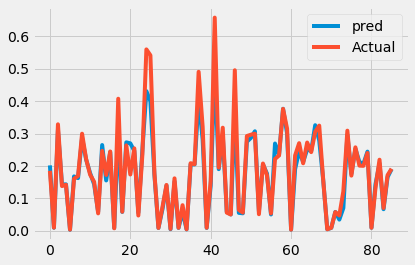

In [25]:
plt.plot(prediction,label='pred')
plt.plot(y_test,label='Actual')
plt.legend()